# import

In [1]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
figure4_data_dict = load_h5(os.path.join(current_working_dir,r"f4_data.h5"))

X_scaled = figure4_data_dict['bts_X_scaled']
Y_scaled = figure4_data_dict['bts_Y_scaled']

# figure B

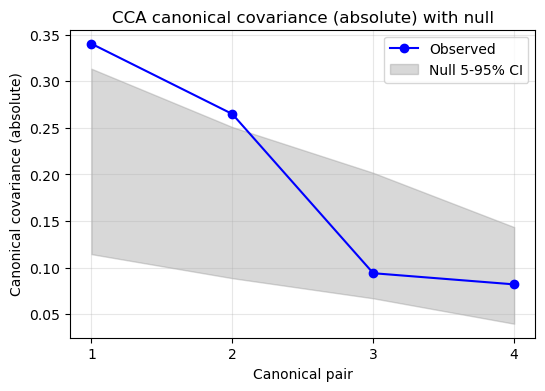

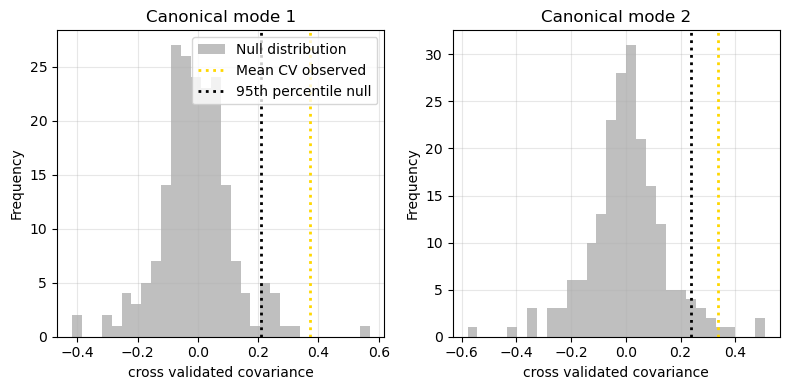

In [2]:
# Usage
cca_scree_absolute_with_null(X_scaled, Y_scaled, 6, n_components=4, n_shuffles=1000)

# cross validation
cv_covs, null_covs_all = compute_fold_wise_cross_validation(X_scaled,Y_scaled)
n_modes = 2  # number of canonical modes
plt.figure(figsize=(4*n_modes, 4))
for i in range(n_modes):
    plt.subplot(1, n_modes, i+1)
    obs = cv_covs[:, i]           # cross-validated covariances
    nulls = null_covs_all[:, i]   # null covariances
    null_95 = np.percentile(nulls, 95)
    # Histogram of null covariances
    plt.hist(nulls, bins=30, color='gray', alpha=0.5, label='Null distribution')
    # Mean CV observed
    plt.axvline(obs.mean(), color='gold', linestyle=':', linewidth=2, label='Mean CV observed')
    # 95th percentile of null
    plt.axvline(null_95, color='k', linestyle=':', linewidth=2, label='95th percentile null')
    plt.xlabel('cross validated covariance')
    plt.ylabel('Frequency')
    plt.title(f'Canonical mode {i+1}')
    plt.grid(alpha=0.3)
    if i == 0:
        plt.legend()
plt.tight_layout()

# figure C & D

Canonical correlation (component 1): 0.413
Canonical correlation (component 2): 0.299


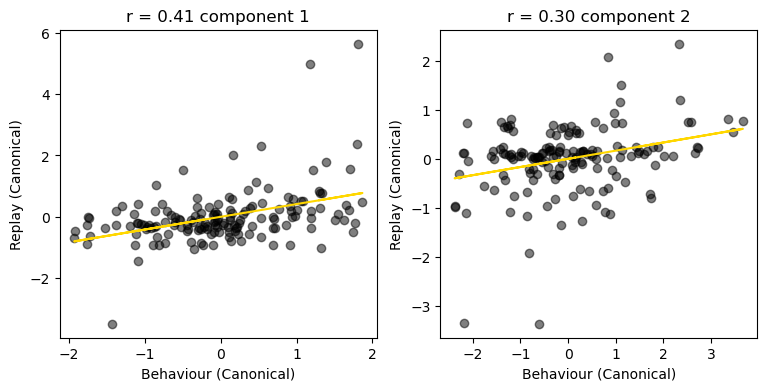

[0.    0.001]
Component 1: corr=0.413, 95% CI=(0.391, 0.567)
Component 2: corr=0.299, 95% CI=(0.260, 0.445)


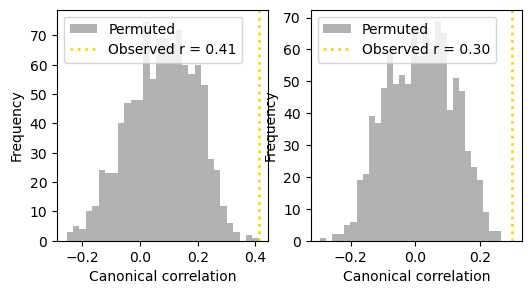

In [3]:
# plot correlations
n_components= 2
cca = CCA(n_components)
X_c, Y_c = cca.fit_transform(X_scaled, Y_scaled)
# Plot canonical variates
plot_canonical_variates(X_c, Y_c,n_components)
plt.show()

#plot
plot_correlation_permutation(X_scaled,Y_scaled,2)
# fdrcorrection returns boolean array of which are significant
significant, p_vals_corrected = fdrcorrection(calculate_pvals(X_scaled,Y_scaled,n_components), alpha=0.05)
print(p_vals_corrected)
# print bootstrapped correlations
return_correlation_bootstrapped(X_scaled,Y_scaled)

# figure E & F

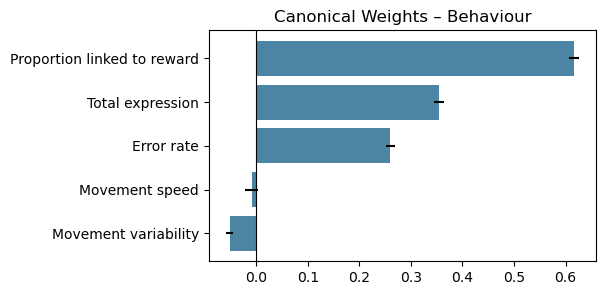

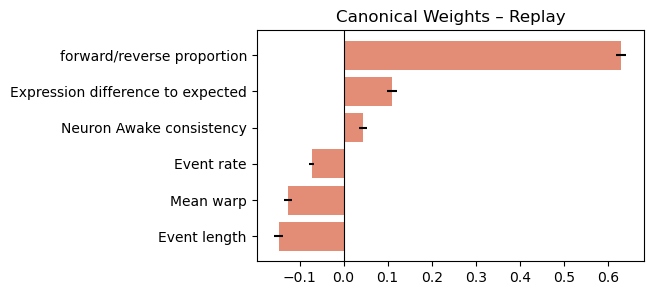

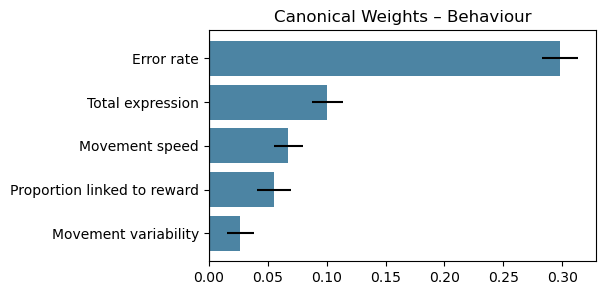

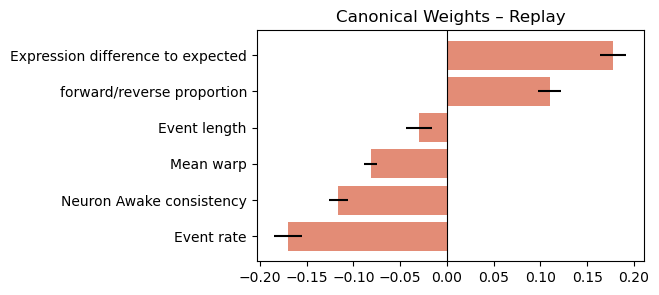

In [4]:
# cv 1
plot_weights(X_scaled,Y_scaled,0)
# cv 2
plot_weights(X_scaled,Y_scaled,1)

# figure H

c:\miniconda\envs\proc_replay_2025\lib\site-packages\sklearn\cross_decomposition\_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


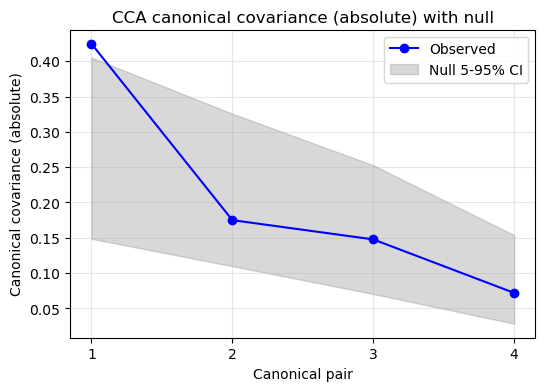

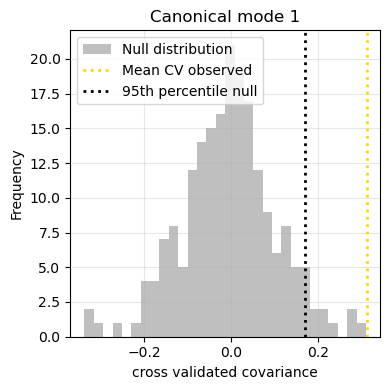

In [5]:
stb_X_scaled = figure4_data_dict['stb_X_scaled']
stb_Y_scaled = figure4_data_dict['stb_Y_scaled']

# Usage
cca_scree_absolute_with_null(stb_X_scaled, stb_Y_scaled, 5, n_components=4, n_shuffles=1000)

# cross validation
cv_covs, null_covs_all = compute_fold_wise_cross_validation(stb_X_scaled,stb_Y_scaled)
n_modes = 1  # number of canonical modes
plt.figure(figsize=(4*n_modes, 4))
for i in range(n_modes):
    plt.subplot(1, n_modes, i+1)
    obs = cv_covs[:, i]           # cross-validated covariances
    nulls = null_covs_all[:, i]   # null covariances
    null_95 = np.percentile(nulls, 95)
    # Histogram of null covariances
    plt.hist(nulls, bins=30, color='gray', alpha=0.5, label='Null distribution')
    # Mean CV observed
    plt.axvline(obs.mean(), color='gold', linestyle=':', linewidth=2, label='Mean CV observed')
    # 95th percentile of null
    plt.axvline(null_95, color='k', linestyle=':', linewidth=2, label='95th percentile null')
    plt.xlabel('cross validated covariance')
    plt.ylabel('Frequency')
    plt.title(f'Canonical mode {i+1}')
    plt.grid(alpha=0.3)
    if i == 0:
        plt.legend()
plt.tight_layout()

# figure I

Canonical correlation (component 1): 0.468


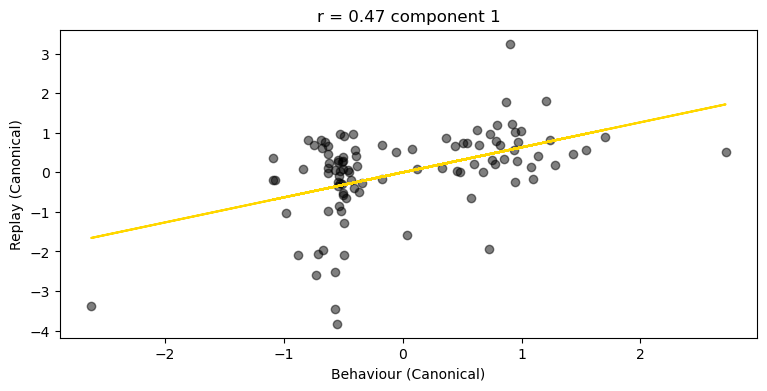

[0.]
Component 1: corr=0.468, 95% CI=(0.434, 0.668)
Component 2: corr=0.241, 95% CI=(0.259, 0.496)


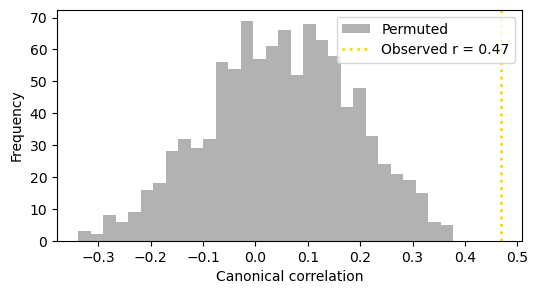

In [6]:
# plot correlations
n_components= 1
cca = CCA(n_components)
X_c, Y_c = cca.fit_transform(stb_X_scaled, stb_Y_scaled)
# Plot canonical variates
plot_canonical_variates(X_c, Y_c,n_components)
plt.show()

#plot
plot_correlation_permutation(stb_X_scaled,stb_Y_scaled,1)
# fdrcorrection returns boolean array of which are significant
significant, p_vals_corrected = fdrcorrection(calculate_pvals(stb_X_scaled,stb_Y_scaled,n_components), alpha=0.05)
print(p_vals_corrected)
# print bootstrapped correlations
return_correlation_bootstrapped(stb_X_scaled,stb_Y_scaled)

# figure J

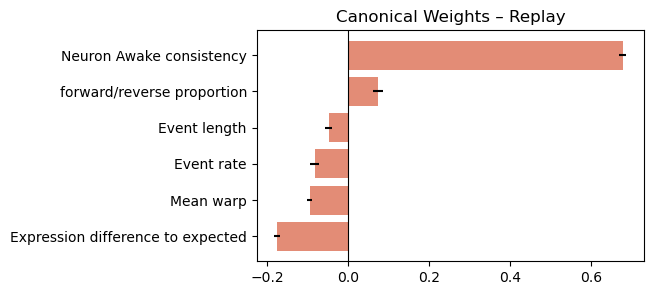

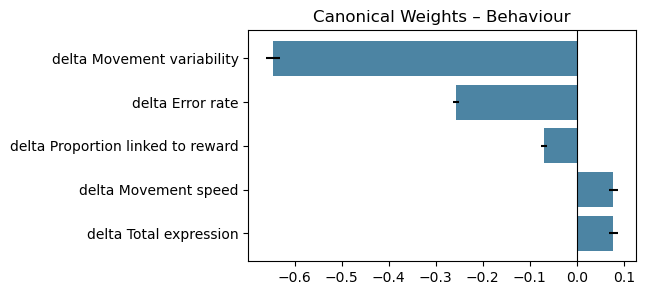

In [7]:
# cv 1
plot_weights_delta(stb_X_scaled,stb_Y_scaled,1)